<a href="https://colab.research.google.com/github/praveen61204/HCLTECH/blob/master/assignment/paper2/Assignment2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. MLP (Multi-Layer Perceptron) is a basic type of neural network made of fully connected (Dense) layers.

Each layer consists of neurons connected to every neuron in the next layer.

Structure:

Input Layer — receives the data (image pixels)

Hidden Layers — extract patterns and relationships

Output Layer — predicts which class the image belongs t

In [8]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

#  Load and preprocess data
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize images (0–255 → 0–1)
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Convert labels to one-hot encoding
y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

# a simple MLP model
model = keras.Sequential([
    layers.Flatten(input_shape=(32, 32, 3)),   # Convert image to 1D vector
    layers.Dense(512, activation='relu'),
    layers.Dense(256, activation='relu'),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')     # 10 output classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=64,
    validation_split=0.1
)

# Evaluate on test data
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n Test accuracy: {test_acc:.4f}")


Epoch 1/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.2686 - loss: 2.0208 - val_accuracy: 0.3764 - val_loss: 1.7539
Epoch 2/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.3854 - loss: 1.7135 - val_accuracy: 0.4132 - val_loss: 1.6609
Epoch 3/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4165 - loss: 1.6203 - val_accuracy: 0.4270 - val_loss: 1.5990
Epoch 4/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4446 - loss: 1.5597 - val_accuracy: 0.4372 - val_loss: 1.5743
Epoch 5/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4628 - loss: 1.5008 - val_accuracy: 0.4482 - val_loss: 1.5306
Epoch 6/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4732 - loss: 1.4681 - val_accuracy: 0.4626 - val_loss: 1.4928
Epoch 7/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4899 - loss: 1.4270 - val_accuracy: 0.4714 - val_loss: 1.4744
Epoch 8/10
704/704 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.5025 - loss: 1.3935 - val_accuracy: 0.

2. RECURRENT NEURAL NETWORK is mainly used for sequential data processing
It “remembers” information from earlier words while reading the sentence


Single neuron → predicts if the review is positive or negative

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Load the IMDB dataset
# num_words=10000 means we keep only the top 10,000 most frequent words
(x_train, y_train), (x_test, y_test) = keras.datasets.imdb.load_data(num_words=10000)

# Pad sequences to make them all the same length
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=200)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=200)

# Build a simple RNN model
model = keras.Sequential([
    layers.Embedding(input_dim=10000, output_dim=32, input_length=200),
    layers.SimpleRNN(32),                # RNN layer
    layers.Dense(1, activation='sigmoid')  # Output: 0 (negative) or 1 (positive)
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# Train the model
model.fit(
    x_train, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2
)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"\n✅ Test Accuracy: {test_acc:.4f}")


17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


313/313 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - accuracy: 0.5892 - loss: 0.6687 - val_accuracy: 0.7762 - val_loss: 0.5002
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 16ms/step - accuracy: 0.8267 - loss: 0.4121 - val_accuracy: 0.8446 - val_loss: 0.3597
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9108 - loss: 0.2411 - val_accuracy: 0.8530 - val_loss: 0.3598
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 15ms/step - accuracy: 0.9579 - loss: 0.1334 - val_accuracy: 0.8516 - val_loss: 0.4082
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.9804 - loss: 0.0699 - val_accuracy: 0.8056 - val_loss: 0.5156
782/782 - 4s - 5ms/step - accuracy: 0.7988 - loss: 0.5318

✅ Test Accuracy: 0.7988


Demonstrate the different types of autoencoders using Fashion MNIST dataset and any industrial dataset.

BASIC AUTOENCODER

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_8 (InputLayer)      │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 64)             │        50,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 784)            │        50,960 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,200 (395.31 KB)

 Trainable params: 101,200 (395.31 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4719 - val_loss: 0.3291
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3203 - val_loss: 0.3078
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3029 - val_loss: 0.2951
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2914 - val_loss: 0.2886
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2858 - val_loss: 0.2846
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2820 - val_loss: 0.2822
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2800 - val_loss: 0.2809
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2785 - val_loss: 0.2794
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2775 - val_loss: 0.2785
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2757 - val_loss: 0.2775
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


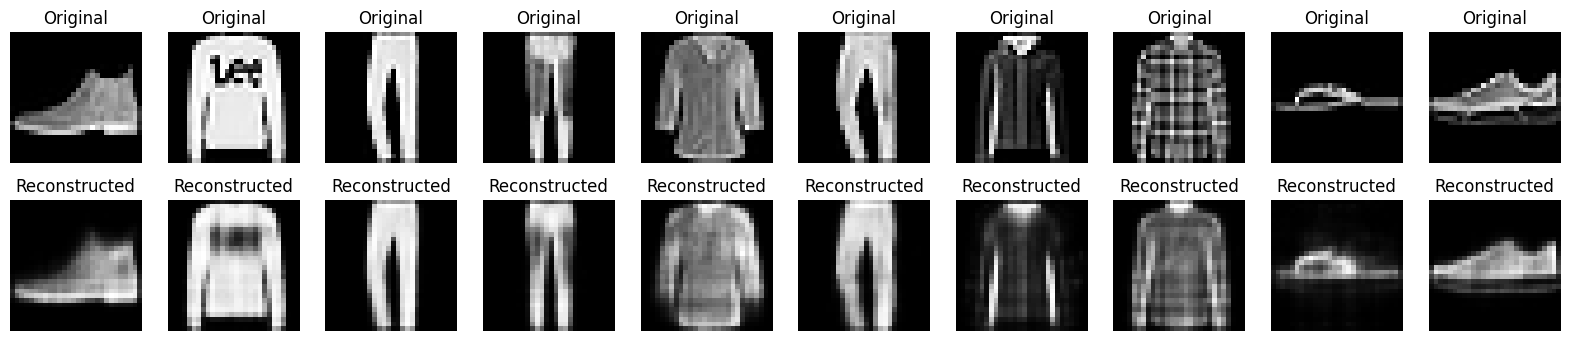

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

# Load Fashion MNIST
(x_train, _), (x_test, _) = keras.datasets.fashion_mnist.load_data()
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (28x28 → 784)
x_train = x_train.reshape((len(x_train), 784))
x_test = x_test.reshape((len(x_test), 784))

# Define basic autoencoder
encoding_dim = 64  # compressed size

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

autoencoder = keras.Model(input_img, decoded)

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.summary()

# Train
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

# Test reconstruction
decoded_imgs = autoencoder.predict(x_test)

# Display results
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()


DENOISING AUTOENCODER

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3172 - val_loss: 0.3051
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3014 - val_loss: 0.3026
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2998 - val_loss: 0.3012
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2980 - val_loss: 0.3005
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2978 - val_loss: 0.3003
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.2966 - val_loss: 0.2994
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2972 - val_loss: 0.2990
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2954 - val_loss: 0.2990
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2957 - val_loss: 0.2986
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2952 - val_loss: 0.2985
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


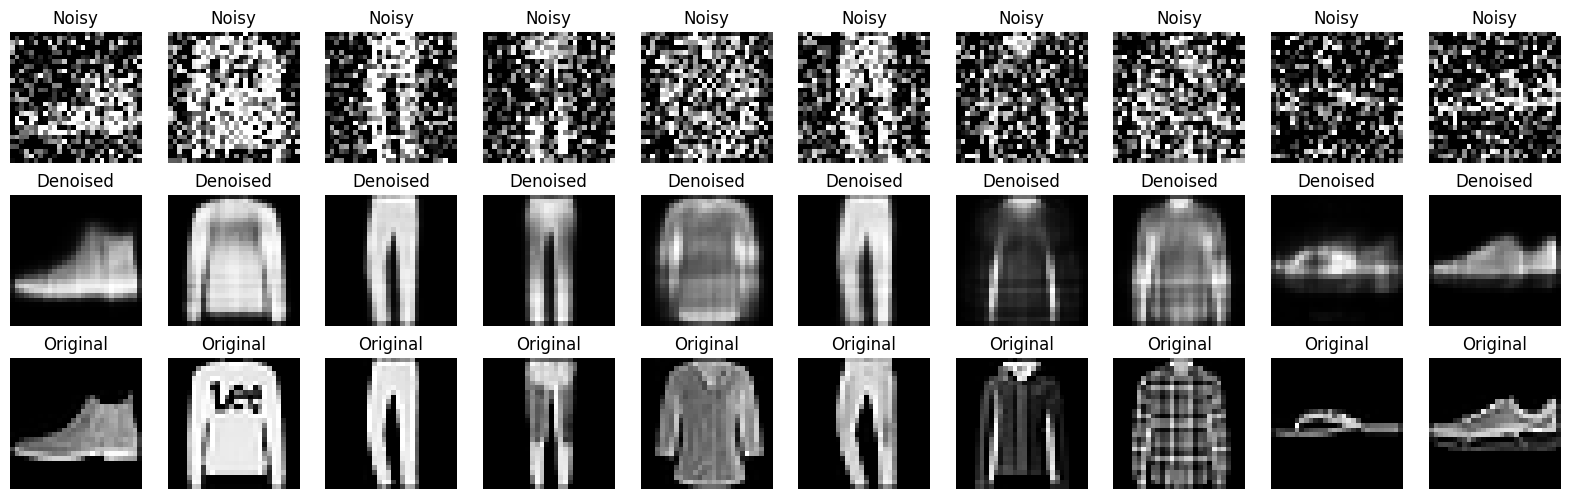

In [11]:
# Add noise
noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(size=x_train.shape)
x_test_noisy = x_test + noise_factor * np.random.normal(size=x_test.shape)
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

# Same model as before
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

# Predict
decoded_imgs = autoencoder.predict(x_test_noisy)

# Display noisy vs denoised
n = 10
plt.figure(figsize=(20, 6))
for i in range(n):
    # Noisy
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28), cmap="gray")
    plt.title("Noisy")
    plt.axis("off")

    # Denoised
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Denoised")
    plt.axis("off")

    # Original
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")
plt.show()


SPARSE AUTOENCODER

Epoch 1/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.6392 - val_loss: 0.4535
Epoch 2/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4394 - val_loss: 0.4097
Epoch 3/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4034 - val_loss: 0.3906
Epoch 4/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3857 - val_loss: 0.3785
Epoch 5/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3745 - val_loss: 0.3696
Epoch 6/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3668 - val_loss: 0.3639
Epoch 7/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3603 - val_loss: 0.3600
Epoch 8/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.3580 - val_loss: 0.3575
Epoch 9/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3560 - val_loss: 0.3555
Epoch 10/10
235/235 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.3536 - val_loss: 0.3538
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


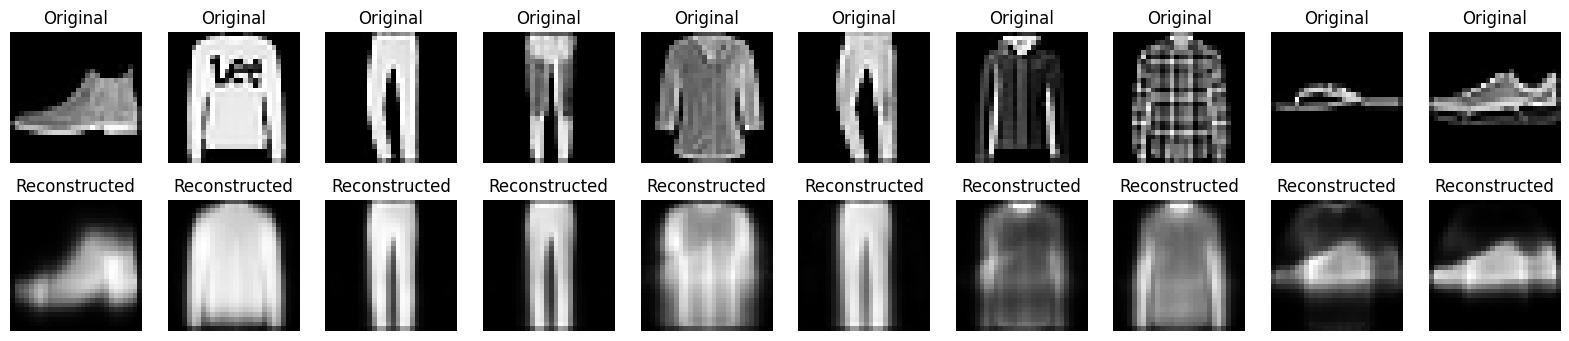

In [12]:
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

input_img = keras.Input(shape=(784,))
encoded = layers.Dense(128, activation='relu',
                       activity_regularizer=regularizers.l1(1e-5))(input_img)
decoded = layers.Dense(784, activation='sigmoid')(encoded)

sparse_autoencoder = keras.Model(input_img, decoded)
sparse_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

sparse_autoencoder.fit(x_train, x_train,
                       epochs=10,
                       batch_size=256,
                       shuffle=True,
                       validation_data=(x_test, x_test))
# Get reconstructed images
decoded_imgs = sparse_autoencoder.predict(x_test)

# Display original vs reconstructed

n = 10  # number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.title("Original")
    plt.axis("off")

    # Reconstructed
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.title("Reconstructed")
    plt.axis("off")
plt.show()
